Створення набору даних для бінарної класифікації

In [2]:
import pandas as pd
import numpy as np

def generate_binary_classification_data(num_samples, features_range, grades_range, random_seed):
    np.random.seed(random_seed)

    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)))

    labels = np.where((feature_1 >= grades_range[0]) & (feature_1 <= grades_range[1]) &
                      (feature_2 >= grades_range[0]) & (feature_2 <= grades_range[1]), 1, 0)

    df = pd.DataFrame({'Labs': feature_1, 'Practices': feature_2, 'Target': labels})

    return df

binary_data = generate_binary_classification_data(num_samples=200, features_range=(1, 100), grades_range=(60, 100), random_seed=56)

binary_data.to_csv('binary_data.csv', index=False)
binary_data

,Labs,Practices,Target
0,98.0,7.0,0
1,34.0,29.0,0
2,68.0,50.0,0
3,20.0,10.0,0
4,36.0,85.0,0
...,...,...,...
195,98.0,93.0,1
196,6.0,37.0,0
197,5.0,23.0,0
198,98.0,19.0,0


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = binary_data.drop('Target', axis=1)
y = binary_data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

binary_model = Sequential([
  Dense(10, activation='relu', input_shape=(X.shape[1],)),
  Dense(10, activation='relu'),
  Dense(1, activation='sigmoid')
])

binary_model.compile(loss="binary_crossentropy",
                optimizer='adam',
                metrics=['accuracy'])

binary_history = binary_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

binary_test_loss, binary_test_accuracy = binary_model.evaluate(X_test_scaled, y_test)
print(f"Втрата моделі на тестовому наборі: {binary_test_loss}")
print(f"Точність моделі на тестовому наборі: {100*binary_test_accuracy:.2f}%")

Epoch 1/50
5/5 [==============================] - 1s 44ms/step - loss: 0.8883 - accuracy: 0.1437 - val_loss: 0.8782 - val_accuracy: 0.2000
Epoch 2/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8626 - accuracy: 0.1437 - val_loss: 0.8553 - val_accuracy: 0.2000
Epoch 3/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8375 - accuracy: 0.1375 - val_loss: 0.8338 - val_accuracy: 0.2000
Epoch 4/50
5/5 [==============================] - 0s 8ms/step - loss: 0.8163 - accuracy: 0.1187 - val_loss: 0.8139 - val_accuracy: 0.1750
Epoch 5/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7948 - accuracy: 0.1000 - val_loss: 0.7954 - val_accuracy: 0.1000
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 0.7761 - accuracy: 0.0938 - val_loss: 0.7781 - val_accuracy: 0.0500
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 0.7584 - accuracy: 0.1500 - val_loss: 0.7620 - val_accuracy: 0.0750
Epoch 8/50
5/5 [=================

In [4]:
from tensorflow.keras.callbacks import LearningRateScheduler
import math

improved_binary_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

improved_binary_model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]) 

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

lr_improved_binary_scheduler = LearningRateScheduler(lr_schedule)

improved_binary_history = improved_binary_model.fit(X_train_scaled, 
                      y_train, 
                      epochs=300,
                      validation_data=(X_test_scaled, y_test),
                      callbacks=[lr_improved_binary_scheduler])

improved_binary_loss, improved_binary_accuracy = improved_binary_model.evaluate(X_test_scaled, y_test)
print(f"\nВтрата моделі на тестовому наборі: {improved_binary_loss}")
print(f"Точність моделі на тестовому наборі: {100*improved_binary_accuracy:.2f}%")

binary_model_accuracy = binary_history.history['accuracy'][-1]
improved_binary_model_accuracy = improved_binary_history.history['accuracy'][-1]

binary_model_results = [["binary_model", binary_model_accuracy],
                 ["improved_binary_model", improved_binary_model_accuracy]]
all_binary_results = pd.DataFrame(binary_model_results, columns=["model", "accuracy"])
print("\nn", all_binary_results)

Epoch 1/300
5/5 [==============================] - 1s 38ms/step - loss: 0.7334 - accuracy: 0.2313 - val_loss: 0.6785 - val_accuracy: 0.8000 - lr: 0.0010
Epoch 2/300
5/5 [==============================] - 0s 8ms/step - loss: 0.6735 - accuracy: 0.7250 - val_loss: 0.6356 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 3/300
5/5 [==============================] - 0s 9ms/step - loss: 0.6307 - accuracy: 0.9312 - val_loss: 0.6022 - val_accuracy: 0.9500 - lr: 0.0010
Epoch 4/300
5/5 [==============================] - 0s 8ms/step - loss: 0.5947 - accuracy: 0.9812 - val_loss: 0.5664 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 5/300
5/5 [==============================] - 0s 9ms/step - loss: 0.5609 - accuracy: 0.9688 - val_loss: 0.5278 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 0.5230 - accuracy: 0.9563 - val_loss: 0.4862 - val_accuracy: 0.9750 - lr: 0.0010
Epoch 7/300
5/5 [==============================] - 0s 9ms/step - loss: 0.4800 - accurac

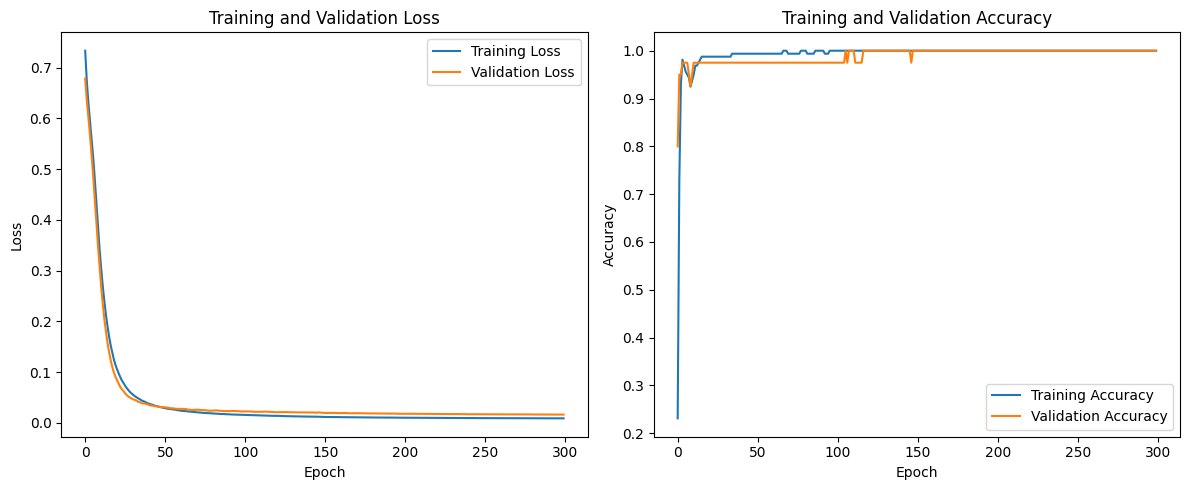

In [5]:
import matplotlib.pyplot as plt

train_loss = improved_binary_history.history['loss']
val_loss = improved_binary_history.history['val_loss']

train_accuracy = improved_binary_history.history['accuracy']
val_accuracy = improved_binary_history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Створення набору даних для мультиклассової класифікації

In [20]:
import pandas as pd
import numpy as np

def generate_classification_data(num_samples, features_range, random_seed):
    np.random.seed(random_seed)

    feature_1 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)
    feature_2 = np.round(np.random.uniform(low=features_range[0], high=features_range[1], size=(num_samples,)), 1)

    conditions = [
        (feature_1 < 36) | (feature_2 < 36),
        (feature_1 >= 36) & (feature_1 < 60) & (feature_2 >= 36) & (feature_2 < 60),
        (feature_1 >= 60) & (feature_2 >= 60)
    ]
    values = ['Low', 'Medium', 'High']

    labels = np.select(conditions, values, default='Low')

    df = pd.DataFrame({'Feature1': feature_1, 'Feature2': feature_2, 'Target': labels})

    return df


multiclass_data = generate_classification_data(num_samples=1000, features_range=(1, 100), random_seed=56)

multiclass_data.to_csv('multiclass_data.csv', index=False)
multiclass_data

,Feature1,Feature2,Target
0,98.4,71.5,High
1,34.0,26.9,Low
2,67.7,84.4,High
3,20.4,47.0,Low
4,36.1,83.9,Low
...,...,...,...
995,67.5,76.4,High
996,62.8,6.6,Low
997,23.0,31.4,Low
998,99.6,67.0,High


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = multiclass_data.drop('Target', axis=1)
y = multiclass_data['Target']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

multiclass_model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

multiclass_model.compile(loss='sparse_categorical_crossentropy',
                 optimizer='adam',
                 metrics=["accuracy"])

multiclass_history = multiclass_model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

multiclass_test_loss, multiclass_test_acc = multiclass_model.evaluate(X_test_scaled, y_test)
print(f"Втрата моделі на тестовому наборі: {multiclass_test_loss}")
print(f"Точність моделі на тестовому наборі: {100*multiclass_test_acc:.2f}%")

Epoch 1/50
25/25 [==============================] - 1s 8ms/step - loss: 0.9308 - accuracy: 0.9038 - val_loss: 0.8664 - val_accuracy: 0.9400
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 0.8129 - accuracy: 0.8712 - val_loss: 0.7430 - val_accuracy: 0.8450
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6881 - accuracy: 0.8025 - val_loss: 0.6184 - val_accuracy: 0.7900
Epoch 4/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5820 - accuracy: 0.7713 - val_loss: 0.5221 - val_accuracy: 0.7800
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7887 - val_loss: 0.4566 - val_accuracy: 0.8050
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4570 - accuracy: 0.8288 - val_loss: 0.4084 - val_accuracy: 0.8700
Epoch 7/50
25/25 [==============================] - 0s 3ms/step - loss: 0.4204 - accuracy: 0.8500 - val_loss: 0.3728 - val_accuracy: 0.8850
Epoch 8/50
25/25 [==

In [1]:
improved_multiclass_model = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

improved_multiclass_model.compile(loss='sparse_categorical_crossentropy',  
                 optimizer='adam',
                 metrics=["accuracy"])

from tensorflow.keras.callbacks import LearningRateScheduler
import math

def lr_schedule(epoch):
    initial_lr = 0.001
    decay_factor = 0.9
    decay_step = 10
    lr = initial_lr * math.pow(decay_factor, math.floor((1 + epoch) / decay_step))
    return lr

lr_multiclass_scheduler = LearningRateScheduler(lr_schedule)

improved_multiclass_history = improved_multiclass_model.fit(X_train_scaled, y_train, epochs=300, validation_data=(X_test_scaled, y_test), callbacks=[lr_multiclass_scheduler])

multiclass_model_accuracy = multiclass_history.history['accuracy'][-1]
improved_multiclass_model_accuracy = improved_multiclass_history.history['accuracy'][-1]

multiclass_model_results = [["multiclass_model", multiclass_model_accuracy],
                 ["improved_multiclass_model", improved_multiclass_model_accuracy]]
all_multiclass_results = pd.DataFrame(multiclass_model_results, columns=["model", "accuracy"])
print("\nn", all_multiclass_results)
print(f"Втрата моделі на тестовому наборі: {multiclass_test_loss}")
print(f"Точність моделі на тестовому наборі: {100*multiclass_test_acc:.2f}%")

NameError: name 'Sequential' is not defined

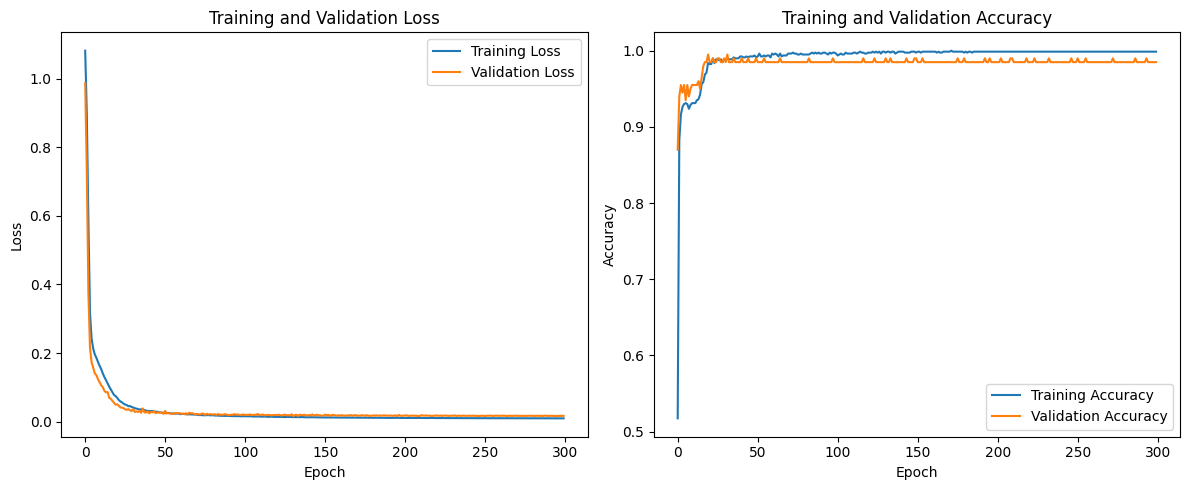

In [23]:
import matplotlib.pyplot as plt

train_loss = improved_multiclass_history.history['loss']
val_loss = improved_multiclass_history.history['val_loss']

train_accuracy = improved_multiclass_history.history['accuracy']
val_accuracy = improved_multiclass_history.history['val_accuracy']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()